In [1]:
using IFSintegrals, Plots;

┌ Info: Precompiling IFSintegrals [2e7d41c8-7523-11ec-3fc2-377bcf57d765]
└ @ Base loading.jl:1423


Create an IFS, as an array of similarities. This IFS will correspond to an attractor (with an associated invariant measure).

In [11]:
ρ = 0.41
    IFS = [
        Similarity(ρ,[0,0]) # first argument is contraction, second is translation
        Similarity(ρ,[1-ρ,0])
        Similarity(ρ,[(1-ρ)/2,sqrt(3)*(1-ρ)/2])
        Similarity(ρ,[(1-ρ)/2,(1-ρ)/(2*sqrt(3))])
    ]
Γ = InvariantMeasure(IFS); # This is our 'fractal'

Sketch the fractal which we will be scattering:

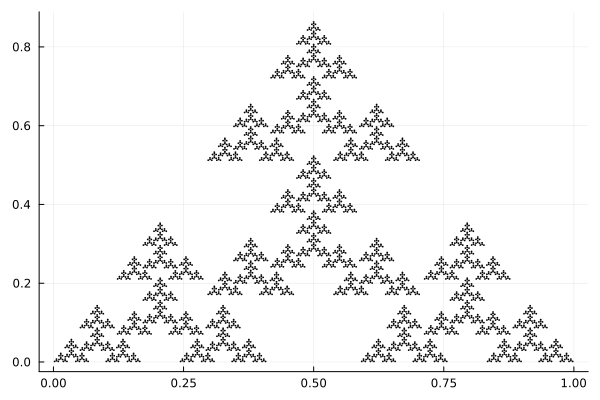

In [3]:
draw(Γ)

The exterior Helmholtz PDE is
$$(\Delta+k^2) u = 0 \quad\text{ in } \quad\mathbb{R}^2\setminus\Gamma,\qquad u=0\text{ on } \Gamma$$.

This can be reformulated as a boundary integral equation: 
$$S\phi = g \quad\text{on } \Gamma,$$ with wavenumber $k$, incident direction $d$, where $S$ is an integral operator.

In [4]:
k = 52.0 # wavenumber
d = [0, 0, -1] # incident direction
S = SingleLayer(Γ, k) # Single layer operator defined on screen Γ, with wavenumber k
g(x) = exp(im*k*(d[1:2]'*x)) # RHS data

g (generic function with 1 method)

Now approximately solve the boundary integral equation, via Galekrin method: Find $\phi_h\in V_N$ which satisfies
$$\left<S\phi_h,\psi_N\right>_{H^{1/2}(\Gamma_\infty)\times H^{-1/2}(\Gamma_\infty)} = \left<g,\psi_N\right>_{H^{1/2}(\Gamma_\infty)\times H^{-1/2}(\Gamma_\infty)},\quad\psi_N\in V_N$$

In [5]:
Sₕ = DiscreteSIO(S; h_mesh = 0.05, h_quad = 0.01) # Galerkin Discretisation of BIO
ϕₕ = Sₕ\g; # Solve linear system (using overloaded linear algebra syntax)

Using representation formulae, plot an approximation to $u$, in $[-0.5,1.5]^2\times\{0\}$:

In [8]:
X,x₁,x₂ = slice([-0.5,-0.5],[1.5,1.5],-0.2,100,100)
Sₖϕₕ = single_layer_potential(ϕₕ,k)# returns function
uⁱ(x) = exp(im*k*(d'*x)) # define inc field in domain
u(x) = uⁱ(x) - Sₖϕₕ(x) # total field

u (generic function with 1 method)

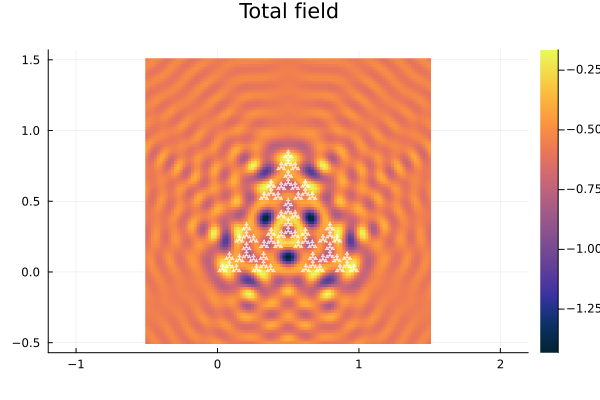

In [10]:
heatmap(x₁,x₂,real(u.(X)), aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)
draw!(Γ,color = "white", markersize=0.5)